In [1]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import plot_model


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image, ImageDraw, ImageFont
import os

font_styles = {
    'Arimo': ['Arimo-Italic-VariableFont_wght', 'Arimo-VariableFont_wght'],
    'Dancing_Script': ['DancingScript-VariableFont_wght'],
    'Fredoka': ['Fredoka-VariableFont_wdth,wght'],
    'Noto_Sans': ['NotoSans-Italic-VariableFont_wdth,wght', 'NotoSans-VariableFont_wdth,wght'],
    'Open_Sans': ['OpenSans-Italic-VariableFont_wdth,wght', 'OpenSans-VariableFont_wdth,wght'],
    'Oswald': ['Oswald-VariableFont_wght'],
    'Patua_One': ['PatuaOne-Regular'],
    'PT_Serif': ['PTSerif-Italic', 'PTSerif-Regular', 'PTSerif-Bold', 'PTSerif-BoldItalic'],
    'Roboto': ['Roboto-BlackItalic', 'Roboto-Regular', 'Roboto-ThinItalic', 'Roboto-Black'],
    'Ubuntu': ['Ubuntu-Light', 'Ubuntu-Regular', 'Ubuntu-Bold', 'Ubuntu-Medium']
}

fonts_data = []

# Directory to save generated images
for folder, fonts in font_styles.items():
    output_dir = f"/content/dataset/{folder}"
    os.makedirs(output_dir, exist_ok=True)
    fonts_data.append(folder)

    # Text to overlay
    text = ["Hello,World!", "World!", "Hello", "World Hello!", ",World", "World!!!!, Hello", "Hello, !!World",
            "!!!Hello,", "Hello@ World", "World@ ", "Hello World", "HELLO WORLD"]

    # Image and font size
    image_size = (400, 100)
    font_size = 36

    # Generate synthetic images
    for word in text:
        for font_name in fonts:
            # Create blank image
            img = Image.new("RGB", image_size, color="white")

            # Load font
            font_path = f"/content/drive/MyDrive/Fonts/{folder}/{font_name}.ttf"
            font = ImageFont.truetype(font_path, font_size)

            # Draw text on image
            draw = ImageDraw.Draw(img)
            draw.text((50, 30), word, fill="black", font=font)

            # Save image
            img.save(os.path.join(output_dir, f"{font_name}_{word}.png"))

print("Synthetic data generation complete.")
print(fonts_data)

Synthetic data generation complete.
['Arimo', 'Dancing_Script', 'Fredoka', 'Noto_Sans', 'Open_Sans', 'Oswald', 'Patua_One', 'PT_Serif', 'Roboto', 'Ubuntu']


In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [4]:
# Importing all the neccessary libraries
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose
import cv2

In [5]:
# Directory containing images
dataset_dir = "/content/dataset"

# Load images and labels
images = []
labels = []

# Iterate through each folder in the data directory
for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".png"):
                img = Image.open(os.path.join(folder_path, filename)).convert("L").resize((400, 100))
                img_array = np.array(img)
                images.append(img_array)
                labels.append(folder)

# Convert lists to numpy arrays
images = np.array(images)

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert numerical labels to one-hot encoded format
one_hot_labels = np.eye(len(np.unique(encoded_labels)))[encoded_labels]

# Print number of samples loaded
print("Samples loaded:", len(images))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)

# Initialize CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(100, 400, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(encoded_labels)), activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_split=0.2)

# Save the model
model.save('fontMatchingModel.h5')

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test[..., np.newaxis], y_test)
print("Validation Accuracy:", accuracy)

Samples loaded: 300
Epoch 1/30
6/6 [==============================] - 66s 10s/step - loss: 300.6566 - accuracy: 0.1510 - val_loss: 4.8106 - val_accuracy: 0.2708
Epoch 2/30
6/6 [==============================] - 49s 8s/step - loss: 7.4592 - accuracy: 0.1042 - val_loss: 2.2943 - val_accuracy: 0.1458
Epoch 3/30
6/6 [==============================] - 49s 9s/step - loss: 2.6634 - accuracy: 0.1979 - val_loss: 2.1564 - val_accuracy: 0.2708
Epoch 4/30
6/6 [==============================] - 44s 8s/step - loss: 3.5357 - accuracy: 0.1823 - val_loss: 2.2903 - val_accuracy: 0.2708
Epoch 5/30
6/6 [==============================] - 47s 8s/step - loss: 2.2539 - accuracy: 0.2135 - val_loss: 2.0993 - val_accuracy: 0.2292
Epoch 6/30
6/6 [==============================] - 44s 7s/step - loss: 2.2146 - accuracy: 0.2448 - val_loss: 2.1300 - val_accuracy: 0.3125
Epoch 7/30
6/6 [==============================] - 44s 7s/step - loss: 2.0988 - accuracy: 0.3073 - val_loss: 2.1669 - val_accuracy: 0.2917
Epoch 8/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 3s 1s/step - loss: 0.8979 - accuracy: 0.6500
Validation Accuracy: 0.6499999761581421


In [6]:
def predict_label_for_image(cropped_img, model):
    # Resize the image to 400x100 pixels
    resized_img = cv2.resize(cropped_img, (400, 100))

    # Convert the resized image to grayscale
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

    # Reshape the grayscale image to match the input shape of the model
    input_img = gray_img.reshape((1, 100, 400, 1))

    # Predict the label for the new image
    predicted_label = model.predict(input_img)

    # Decode the one-hot encoded label to get the predicted class
    predicted_class = np.argmax(predicted_label)

    return predicted_class

In [7]:
model.save('fontMatchingModel.h5')

In [8]:
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "fontMatchingModel.h5"
model = load_model(model_path)

1/1 [==============================] - 0s 74ms/step


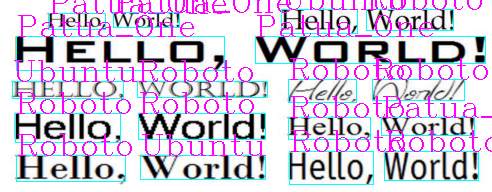

In [9]:
import pytesseract

# Load the image
image = cv2.imread("/content/drive/MyDrive/Fonts/sample.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to preprocess the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU,11)

# Define a function to draw rectangles around detected words
def draw_boxes_on_text(img):
    # Return raw information about the detected texts
    raw_data = pytesseract.image_to_data(img)

    for count, data in enumerate(raw_data.splitlines()):
        if count > 0:
            data = data.split()
            if len(data) == 12:
                x, y, w, h, content = int(data[6]), int(data[7]), int(data[8]), int(data[9]), data[11]
                cv2.rectangle(image, (x, y), (w+x, h+y), (255, 255, 0), 1)
                cropped_image = image[y:h+y, x:w+x]
                predicted_label = predict_label_for_image(cropped_image, model)
                cv2.putText(image, str(fonts_data[predicted_label]), (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 255) , 1)

    return image

# Draw rectangles around detected words
image_with_boxes = draw_boxes_on_text(thresh)

# Display the result
from google.colab.patches import cv2_imshow
cv2_imshow(image_with_boxes)

In [ ]:
!pip install streamlit

!wget -q -O - ipv4.icanhazip.com
!streamlit run app.py & npx localtunnel --port 8501

34.125.239.107



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.239.107:8501

npx: installed 22 in 5.404s
your url is: https://quick-worms-kiss.loca.lt
/root/.npm/_npx/95158/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:38193 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/95158/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)
